#### Question 1: convo with chatbot


link: https://chatgpt.com/share/673e4659-f874-800c-9ac2-83eabbe84ac9

Here's a summary of our conversation:

Classification Decision Trees:

These address problems where the goal is to predict categorical outcomes.
They are useful in applications like medical diagnosis, customer segmentation, fraud detection, and quality control.
Predictions are made by traversing the tree, applying decision rules, and reaching a leaf node that assigns a class label.
Classification vs. Regression:

Classification predicts categorical outcomes, while regression predicts continuous numerical values.
Examples and metrics for both were discussed, highlighting their differences and use cases.
Multiple Linear Regression Predictions:

Predictions are made using a linear equation:
𝑦
^
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑝
𝑥
𝑝
y
^
​
 =β 
0
​
 +β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +⋯+β 
p
​
 x 
p
​
 
Each feature's contribution is weighted by its coefficient, and an intercept adjusts the baseline.
Classification Decision Tree Predictions:

A tree predicts by splitting data into branches based on feature values and rules, ultimately arriving at a leaf node that represents the assigned class.
The tree is trained to maximize separation between classes using metrics like Gini Impurity or Information Gain.

#### Question 2:

###### Accuracy
Accuracy is most useful when the dataset is balanced (similar numbers of positives and negatives) and when both false positives and false negatives are equally costly. Therefore, appropriate real-word applications could be:
- Spam Detection:
A wrong prediction (FP: labeling a legitimate email as spam, or FN: letting spam into the inbox) is an annoyance but not critical. With a balanced dataset (spam ≈ non-spam), accuracy gives a fair assessment of model performance.
- Quality Control:
Misclassifying defective or non-defective products has moderate consequences but isn’t catastrophic. A balanced dataset of defective and non-defective products makes accuracy meaningful.

##### Sensitivity
Sensitivity is critical when false negatives are highly undesirable—when missing a positive case has serious consequences.
- Medical Diagnostics:
FN: A sick patient is incorrectly classified as healthy, missing treatment opportunities. This can lead to severe health risks or death. Prioritizing sensitivity ensures that most sick patients are flagged, even if it means flagging some healthy individuals (FP).
- Fraud Detection:
FN: A fraudulent transaction is missed, leading to financial loss or security breaches. High sensitivity ensures most fraud cases are detected, even at the cost of flagging some legitimate transactions (FP).

##### Specificity
Specificity is key when false positives are more problematic than false negatives—when mistakenly identifying a negative case as positive causes unnecessary harm or cost.
- Criminal Justice:
FP: An innocent person is wrongly accused or convicted. This can lead to severe personal and social consequences. High specificity ensures only true guilty parties are flagged, minimizing harm to innocent individuals.
- Drug Testing:
FP: A non-user is falsely identified as using drugs, leading to reputational or professional damage. High specificity reduces the likelihood of false accusations, even if it means some users (FN) go undetected.

##### Precision
Precision is critical when false positives are costly and you want to ensure that positive predictions are highly trustworthy.
- Hiring Systems:
FP: Hiring an unsuitable candidate wastes time, money, and resources and can negatively impact organizational productivity. High precision ensures that selected candidates are truly suitable, even if it means missing a few qualified ones (FN).
- Targeted Marketing:
FP: Marketing to uninterested customers wastes resources and can irritate recipients, damaging brand reputation. High precision ensures marketing efforts focus on genuinely interested customers, optimizing resources and outcomes.

Chat for question 2: https://chatgpt.com/share/673e4659-f874-800c-9ac2-83eabbe84ac9

summary: Here’s a summary of our recent discussion:

Metrics for Classification Problems:

Accuracy: Measures the proportion of correct predictions. Best used when classes are balanced, and the costs of false positives and false negatives are similar.
Sensitivity (Recall): Measures the proportion of actual positives correctly identified. Prioritized in scenarios where missing positives (false negatives) has high consequences.
Specificity: Measures the proportion of actual negatives correctly identified. Useful in situations where false positives are highly undesirable.
Precision: Measures the proportion of positive predictions that are correct. Important when false positives are costly or when positive predictions need to be reliable.
Real-World Scenarios for Metrics:

Accuracy: Spam detection, quality control.
Sensitivity: Medical diagnostics, fraud detection.
Specificity: Criminal justice, drug testing.
Precision: Hiring systems, targeted marketing.
Rationale Behind Applications:

The choice of metric depends on the costs and consequences of errors:
Sensitivity is emphasized where missing positives (false negatives) can have severe outcomes (e.g., missing a disease diagnosis).
Specificity is prioritized where false positives cause harm (e.g., falsely accusing someone in criminal justice).
Precision is essential where false positives waste resources or lead to poor decisions (e.g., hiring unsuitable candidates).
This discussion focused on understanding how each metric aligns with different real-world needs based on the type and cost of classification errors.

In [25]:
# question 3

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

ab = ab.drop('Weight_oz', axis = 1)
ab = ab.drop('Width', axis = 1)
ab = ab.drop('Height', axis = 1)
ab = ab.dropna()

ab['Pub year'] = ab['Pub year'].round().astype(int)
ab['NumPages'] = ab['NumPages'].round().astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


Accuracy: 0.84
Recall: 0.8045


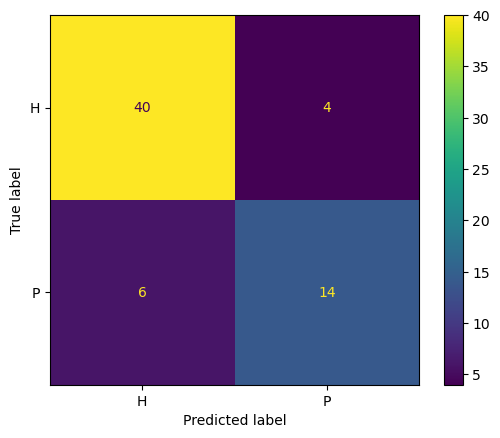

In [36]:
# Question 4

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'ab' is your DataFrame already loaded and preprocessed

# Prepare the target variable (y) - 1 for 'H' (Hardcover), 0 for 'P' (Paperback)
y = pd.get_dummies(ab['Hard_or_Paper'])['H']

# Prepare the feature variable (X) - only 'List Price'
X = ab[['List Price']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cm_display.plot()

# Display recall score
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.4f}')

#### Question 4:

The tree helps us understand how "List Price" is used to predict the book type. Books with a lower "List Price" are likely to be "Paperback", and those with a higher "List Price" are predicted to be "Hardcover". The exact threshold for the split and the final predictions depend on the data, but this is the general idea of what the tree reveals about the relationship between "List Price" and the book type.

Accuracy: 0.6406
Recall: 0.4795


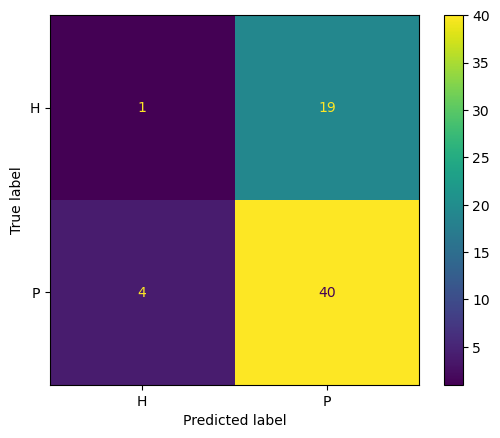

In [38]:
# Question 5

# Define features (X) and target (y)
X = ab[['NumPages', 'Pub year']]  # Adjust to include the relevant columns
y = ab['Hard_or_Paper']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = tree.DecisionTreeClassifier(max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cm_display.plot()

# Display recall score
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.4f}')

#### Question 6

Confusion model 1:

Accuracy: (TP + TN)/(TOTAL)
    = 54 / 64 = 0.84

Sensitivity: TP/(TP + FN)
    = 40 / 44 = 0.91

Specificity: TN/(TN + FP)
    = 14/20 = 0.7
    

Confusion model 2:

Accuracy: (TP + TN)/(TOTAL)
    = 41 / 64 = 0.64

Sensitivity: TP/(TP + FN)
    = 1 / 20 = 0.05

Specificity: TN/(TN + FP)
    = 40/44 = 0.91

#### Question 7

The differences between the two confusion matrices arise from the feature sets used in the models:

In the first matrix, the model is trained using only 'List Price' as the feature, which is a single predictor. This limited feature set likely causes the model to have lower predictive accuracy, as it is constrained to using only one piece of information to make predictions, potentially leading to misclassifications.

In the second matrix, the model uses a more comprehensive set of features, 'NumPages', 'Thick', and 'List Price', which provides more information for the classifier to make better decisions. With more features, the classifier has the potential to capture more complex patterns, improving its accuracy.

However, reviewing the accuracy of the two confusion matrices shows us that clf1 is much more accurate. this could be because of:

- Overfitting: The additional features in clf2 might lead to overfitting, where the model becomes too complex and fits the training data too closely. As a result, it performs well on the training set but struggles to generalize to new, unseen data. Overfitting can happen if the model has more parameters than necessary or if the features don’t add meaningful information.

- Irrelevant or Redundant Features: If the features 'NumPages' and 'Thick' are not informative or are highly correlated with each other or with 'List Price', they may introduce noise into the model. This can reduce the model's performance because it may not be able to extract valuable information from those extra features, leading to lower accuracy.

- Feature Scaling Issues: If the features 'NumPages', 'Thick', and 'List Price' are on different scales (e.g., 'List Price' could have a much larger range than 'NumPages'), the model might have difficulty learning effectively without proper scaling. Decision trees, however, generally don’t require scaling, but if the features have vastly different ranges, this could still impact performance, especially if the model’s splits don’t align well with the data.

- Model Complexity: It's also possible that clf2 was trained with the same max_depth=2 constraint, but the increased number of features results in a decision tree that isn’t deep enough to fully capture the relationships between those features. The model might need a deeper tree or other hyperparameter adjustments to improve performance.

#### Question 8